<a href="https://colab.research.google.com/github/Nikhilwa2309/WOC/blob/main/WOC_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression


y=wx+c
y--> Dependent Variable
x--> Independent variable
w-->weight
b-->bias


GRADIENT DESCENT
w=w-a*dw
b=b-a*db


# BUILDING POLYNOMIAL REGRESSION FROM SCRATCH

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
file_path = '/linear_regression_train.csv'
data = pd.read_csv(file_path)

# Step 2: Preprocess the data
# Replace NaN and infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)

# Separate features (X) and target (y)
X = data.drop(columns=['Target', 'ID'])  # Drop target and ID columns
y = data['Target']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply Polynomial Regression
# Create polynomial features
degree = 2  # Adjust the degree as needed
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 5: Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Mean Squared Error: 114679.09457856168
R^2 Score: 0.9750539378761404
Model Coefficients: [-1.19566766e-12  1.51386926e+01 -7.77225077e+00  1.13517752e+01
  1.64299763e+01  2.47399547e+00  4.77579917e+01  1.47695591e+01
 -3.66648605e-01  1.54480903e+01  8.26678966e+00  5.96900552e-01
 -1.59932031e+00  2.64506500e+01  4.63802966e+01 -2.59811321e+00
  2.93866608e+01 -6.23500067e-01  1.21291881e+01  3.76735667e+01
  4.72385892e+01  1.72794106e+00 -1.34848618e+00  2.58579992e+01
  1.21003559e+01  2.23574699e+00 -4.01731377e-03  1.97023522e-02
  2.28860339e-03 -2.59052116e-03 -5.00902184e-03 -2.24849744e-02
  1.26689789e-03  3.72345533e-04 -8.35665552e-03  4.34390175e-03
 -5.72103273e-03  1.07606865e-03 -1.23923219e-02 -1.10493351e-02
  9.49282727e-03  4.69139379e-03  5.13017470e-03  8.66056852e-03
  3.87936093e-03  7.77453313e-03  3.21529744e-03  1.31712160e-03
  3.46858345e-02 -2.81947713e-03  9.73134755e-06 -3.56037241e-02
  1.78695221e-02  6.26325057e-03 -1.87319617e-02  1.47213803e-02
 

# EVALUATION ON HIDDEN NEW DATA SET

Index(['ID', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15',
       'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20',
       'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25'],
      dtype='object')
Predictions on the new dataset: [1043.18161864 4510.12757432 4057.99952095 ... 4951.72783454 -276.2605055
  540.02606637]


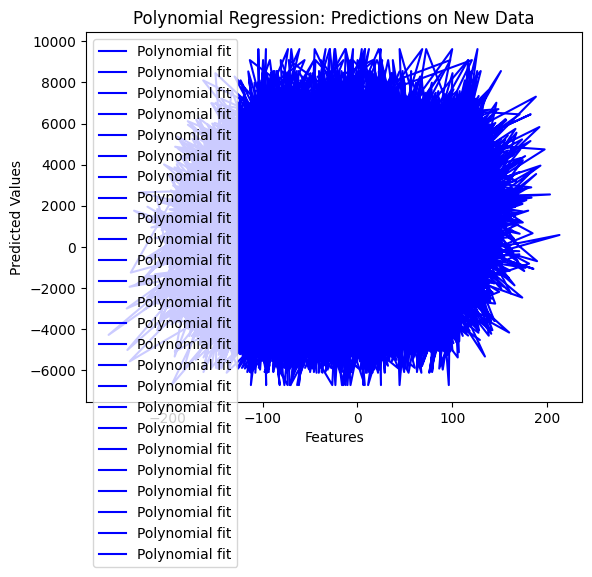

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Step 1: Load the new dataset (hidden dataset)
new_file_path = '/linear_regression_test.csv'  # Replace with your new dataset file path
new_data = pd.read_csv(new_file_path)

# Step 2: Check the columns in the new dataset
print(new_data.columns)  # Check column names to ensure correct reference

# Step 3: Preprocess the new dataset
# Replace NaN and infinite values (same as during training)
new_data.replace([np.inf, -np.inf], np.nan, inplace=True)
new_data.fillna(0, inplace=True)

# Step 4: Separate features (X) for the new dataset
X_new = new_data.drop(columns=['ID'])  # Drop 'ID' column (no target column available)

# Step 5: Apply the same polynomial feature transformation
degree = 2  # Ensure this matches the degree used during training
poly = PolynomialFeatures(degree=degree)

# Transform the features into polynomial features (same transformation as training data)
X_new_poly = poly.fit_transform(X_new)

# Step 6: Use the trained model to make predictions
# Assuming the model is already trained and available as 'model'
y_new_pred = model.predict(X_new_poly)
  # Replace 'ActualTarget' with the actual column name in your dataset


# Output the predictions
print("Predictions on the new dataset:", y_new_pred)

# Optionally, visualize the predictions (if you know the target values, you can plot actual vs predicted)
plt.plot(X_new, y_new_pred, color='blue', label='Polynomial fit')
plt.title('Polynomial Regression: Predictions on New Data')
plt.xlabel('Features')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


#LINEAR REGRESSION FROM SCRATCH

Optimal Theta: [75389.53761084 26292.4730296 ]
Mean Squared Error: 49855275.6246176
R² Score: 0.9023968842139327

Predicted values:
[115783.59737049  71494.62049561 102591.13617371  75263.89512326
  55475.2033281   60186.79661266]

Actual values:
[112635.  67938. 113812.  83088.  64445.  57189.]


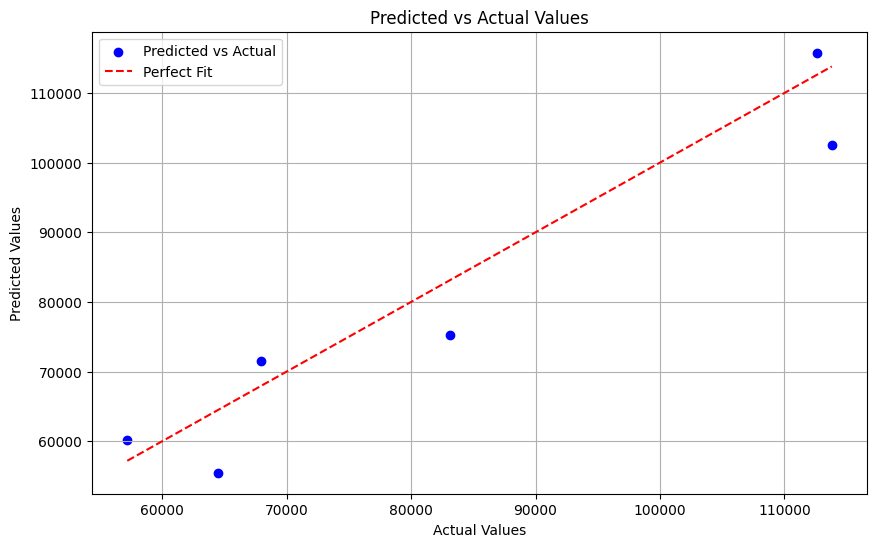

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
file_path = '/Salary_Data.csv'  # Replace with your dataset file path
data = pd.read_csv(file_path)

# Step 2: Preprocess the data
# Assuming the target column is 'Target' and features are all other columns
X = data.drop(columns=['Salary'])
y = data['Salary']

# Step 3: Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Add a column of ones for the bias term (intercept)
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Initialize parameters (theta) for Linear Regression
theta = np.zeros(X_train.shape[1])  # Initialize with zeros (one value per feature + bias term)

# Step 7: Define the hypothesis function (h(X) = X * theta)
def hypothesis(X, theta):
    return np.dot(X, theta)

# Step 8: Define the cost function (Mean Squared Error)
def cost_function(X, y, theta):
    m = len(y)
    return (1 / (2 * m)) * np.sum((hypothesis(X, theta) - y) ** 2)

# Step 9: Implement gradient descent
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        # Compute the gradient (derivative of the cost function w.r.t. theta)
        gradients = (1 / m) * np.dot(X.T, hypothesis(X, theta) - y)
        # Update theta using the gradients
        theta -= learning_rate * gradients
        # Record the cost for each iteration
        cost_history.append(cost_function(X, y, theta))

    return theta, cost_history

# Step 10: Train the model using gradient descent
theta_optimal, cost_history = gradient_descent(X_train, y_train, theta, learning_rate=0.01, iterations=1000)

# Step 11: Make predictions on the test set
y_pred = hypothesis(X_test, theta_optimal)

# Step 12: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print(f"Optimal Theta: {theta_optimal}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Step 13: Show the predicted values and the actual values for comparison
print("\nPredicted values:")
print(y_pred)

print("\nActual values:")
print(y_test.values)

# Step 14: Visualization - Plot the predicted vs actual values
plt.figure(figsize=(10, 6))

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


#Logistic regression

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
file_path = '/content/binary_classification_train.csv'
data = pd.read_csv(file_path)

# Preprocessing
X = data.iloc[:, 1:-1].values  # Features (excluding ID and Class)
y = data['Class'].values       # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Implementation
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.array([1 if i > 0.5 else 0 for i in y_predicted])

# Train the model
model = LogisticRegression(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


<ipython-input-45-918facde5cf4>:26: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy: 92.86%


#TESTING FROM THE HIDDEN DATA SET

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [53]:
file_path = '/content/binary_classification_train.csv'
n_data = pd.read_csv(file_path)


In [48]:
# Remove the 18th column (index 17)
n_data = n_data.drop(n_data.columns[17], axis=1)


In [49]:
X_test = n_data.iloc[:, 1:].values

In [50]:
y_pred = model.predict(X_test)

In [51]:
print("Predicted labels:", y_pred[:10])

Predicted labels: [1 1 1 0 0 1 1 1 1 1]


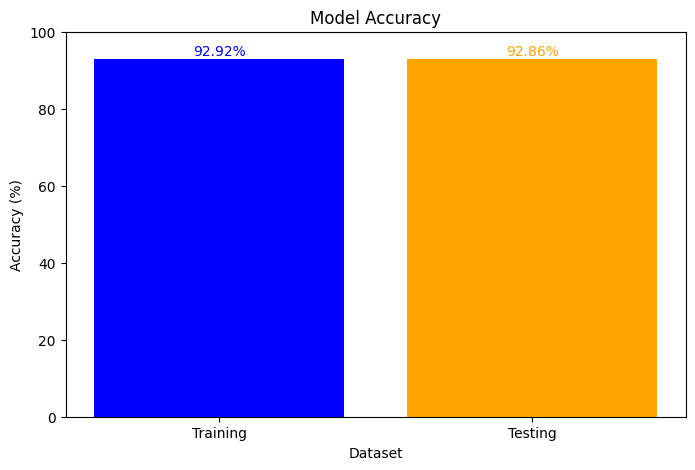

In [52]:
import matplotlib.pyplot as plt

# Calculate accuracy for training data
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Plotting accuracy
datasets = ['Training', 'Testing']
accuracies = [train_accuracy * 100, accuracy * 100]

plt.figure(figsize=(8, 5))
plt.bar(datasets, accuracies, color=['blue', 'orange'])
plt.ylim(0, 100)  # Accuracy is a percentage
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Dataset')
plt.text(0, train_accuracy * 100 + 1, f"{train_accuracy * 100:.2f}%", ha='center', color='blue')
plt.text(1, accuracy * 100 + 1, f"{accuracy * 100:.2f}%", ha='center', color='orange')
plt.show()


# MULTI CLASSIFICATION DATA

In [58]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report

# Loading a dataset (Iris dataset as an example)
file_path = '/content/multi_classification_train.csv'
m_data = pd.read_csv(file_path)

X = m_data  # Features
y = m_data.Class  # Labels

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features (optional but recommended for most models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing and training the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Printing classification report for detailed performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 99.99%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1157
           1       1.00      1.00      1.00      3461
           2       1.00      1.00      1.00      5036
           3       1.00      1.00      1.00      3016
           4       1.00      1.00      1.00      1730

    accuracy                           1.00     14400
   macro avg       1.00      1.00      1.00     14400
weighted avg       1.00      1.00      1.00     14400



In [62]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Loading the original dataset (Iris dataset as an example)
file_path = '/content/multi_classification_train.csv'
m_data = pd.read_csv(file_path)
# Assuming new_data is your DataFrame
m_data = m_data.drop(m_data.columns[-2], axis=1)




X = m_data  # Features
y = m_data.Class  # Labels
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing and training the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Saving the trained model and scaler (for future use)
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Load the hidden new dataset (e.g., 'new_data.csv')
# Assuming the new dataset has the same feature columns as the original dataset
new_data = pd.read_csv('/content/multi_classification_test.csv')  # Replace with your dataset path
new_features = new_data.values  # Convert the dataset to a NumPy array

# Preprocessing the new dataset (standardizing)
scaler = joblib.load('scaler.pkl')
new_features_scaled = scaler.transform(new_features)

# Load the trained model
model = joblib.load('logistic_regression_model.pkl')

# Predicting using the trained model
predictions = model.predict(new_features_scaled)

# Printing the predictions
print("Predictions for the new dataset:")
print(predictions)
print(f"Accuracy on the new dataset: {accuracy * 100:.2f}%")

# If you have true labels for the new dataset, you can also evaluate the performance
# Example (if you have true labels `true_labels` for the new data):
# accuracy = accuracy_score(true_labels, predictions)
# print(f"Accuracy on the new dataset: {accuracy * 100:.2f}%")


Predictions for the new dataset:
[0 0 0 ... 0 0 0]
Accuracy on the new dataset: 99.99%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
